# Thresholding
Thresholding is a technique of image segmentation. It separates a given single-channel image (or stack) into two regions: Pixels with intensity below a given threshold, also called "background" and pixels with intensity above a given threshold, "foreground". Typically those algorithms result in binary images where background intensity is 0 and foreground intensity is 1. When applying such algorithms in ImageJ, foreground pixels are 255. In scikit-image, background pixels are `False` and foreground pixels are `True`.

See also
* [Thresholding (wikipedia)](https://en.wikipedia.org/wiki/Thresholding_(image_processing))
* [Threshold algorithms in scikit-image](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html)

In [7]:
from skimage.io import imread

image = imread("blobs.tif")

As a recap, we can show images using [imshow in scikit image](https://scikit-image.org/docs/dev/api/skimage.io.html#skimage.io.imshow).

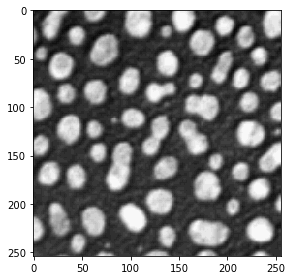

In [8]:
from skimage.io import imshow

imshow(image)

## Image segmentation by thresholding
The [threshold_otsu](https://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.threshold_otsu) operation delivers a number - the threshold to be applied.

In [9]:
from skimage import filters

threshold = filters.threshold_otsu(image)
print(threshold)

120


Using numpy arrays, we can apply the threshold by applying the >= operato

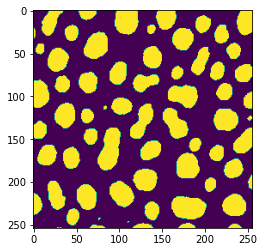

In [10]:
thresholded_image = image >= threshold

plt.imshow(thresholded_image)
plt.show()

To visualize a segmentation result, napari can be used.

In [12]:
%gui qt

In [13]:
import napari

# start napari
viewer = napari.Viewer()

# add image
viewer.add_image(image)

# add binary image as labels
labels = viewer.add_labels(thresholded_image)

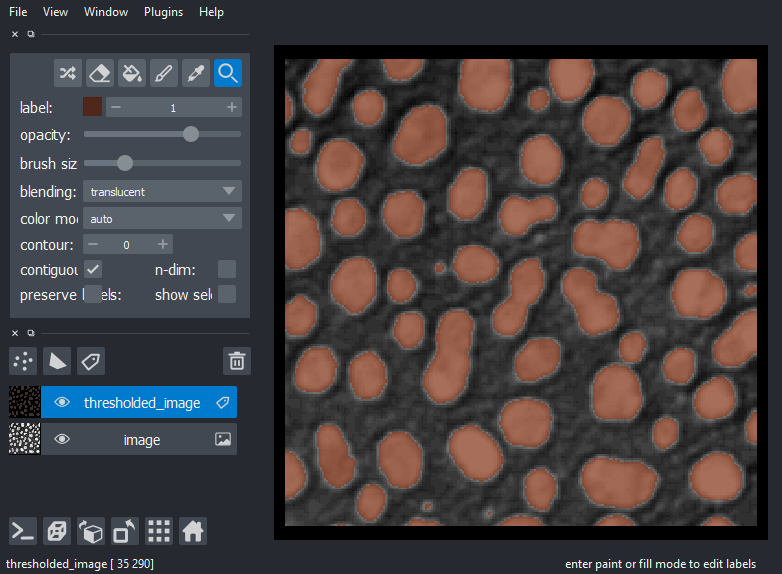

In [14]:
napari.utils.nbscreenshot(viewer)

In [15]:
# hide labels layer
labels.visible = False

To improve visualization, we can also show the edges of segmented objects in the viewer.

In [17]:
from skimage.segmentation import find_boundaries

edge_image = find_boundaries(thresholded_image)

# add edges image as labels
viewer.add_labels(edge_image)

<Labels layer 'edge_image' at 0x134f86ef460>

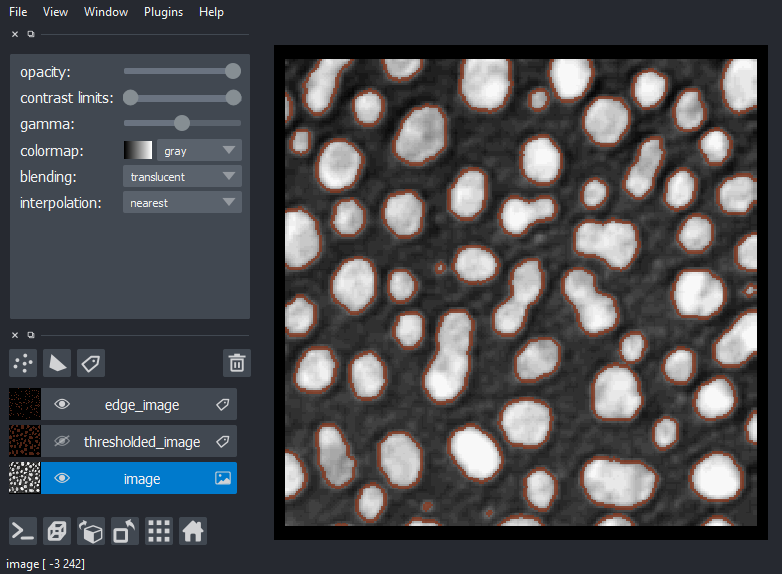

In [18]:
napari.utils.nbscreenshot(viewer)

There is a list of [thresholding algorithms](https://scikit-image.org/docs/dev/auto_examples/segmentation/plot_thresholding.html) available. It is possible to apply them all to your data and see differences:

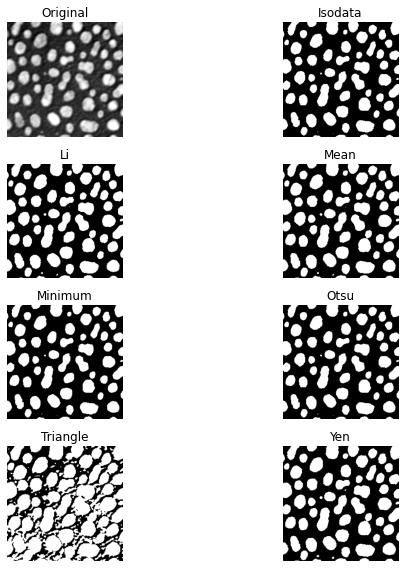

In [11]:
from skimage.filters import try_all_threshold
from matplotlib import pyplot as plt

fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
plt.show()

# Exercise
Segment blobs.tif using the Yen algorithm. Use matplotlib to draw a green outline of the segmented objects around the regions on the original image.

Segment the image using a calculated threshold according to this equation:

In [ ]:
threshold = mean + 2 * standard_deviation

Visualize the resulting segmentation with a red outline on top of the original image and the green outline from above.